# Práctica 1
Miriam Méndez y Laura Lasso
## 1 Importación de librerías y carga de datos

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import torchvision
import torchvision.utils as vutils
from torchvision.transforms import RandomHorizontalFlip, RandomRotation

import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset, random_split

In [18]:
os.getcwd()

'c:\\Users\\Alcampo\\OneDrive - Universidad de Las Palmas de Gran Canaria\\Desktop\\tercer año\\AA2\\trabajo de curso'

In [29]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth('C:/Users/Alcampo/OneDrive - Universidad de Las Palmas de Gran Canaria/Desktop/tercer año/AA2/trabajo de curso/client_secret_14529119162-ifss1vgli97sa39ksob2ofjr7calm4hj.apps.googleusercontent.comt.json')
gauth.LocalWebserverAuth()

drive = GoogleDrive(gauth)


InvalidConfigError: Invalid client secrets file ('Error opening file', 'client_secrets.json', 'No such file or directory', 2)

In [31]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [6]:
print(torch.cuda.is_available())
#print(torch.cuda.get_device_name(0))

False


In [7]:
DATASET = os.path.join('/content/drive/My Drive/AA2/datasets', 'data') # esto puede cambiar dependiendo de donde se ejecute el notebook
INITIAL_SIZE_OF_IMAGES = (128, 128)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
data_transforms = transforms.Compose([
    transforms.Resize(INITIAL_SIZE_OF_IMAGES),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root=DATASET, transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '/content/drive/My Drive/AA2/datasets\\data'

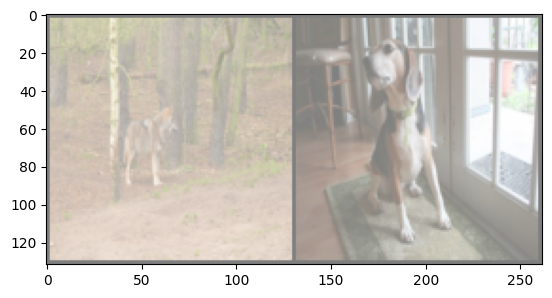

In [ ]:
# Obtiene un batch de imagenes
dataiter = iter(train_loader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Mostramos las imagenes
imshow(vutils.make_grid(images[1:3], normalize=True))


In [ ]:
train_size = int(0.7 * len(train_dataset))  # 70% para entrenamiento
remaining = len(train_dataset) - train_size
val_size = int(0.5 * remaining)  # 15% para validación
test_size = remaining - val_size  # 15% para prueba

train_data, remaining_data = random_split(train_dataset, [train_size, remaining])
val_data, test_data = random_split(remaining_data, [val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
print(len(test_loader))

10


## Otro datasest

In [ ]:
DATASET = os.path.join('/content/drive/My Drive/AA2/datasets', 'data') # esto puede cambiar dependiendo de donde se ejecute el notebook
INITIAL_SIZE_OF_IMAGES = (128, 128)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
data_transforms = transforms.Compose([
    transforms.Resize(INITIAL_SIZE_OF_IMAGES),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root=DATASET, transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
# Obtiene un batch de imagenes
dataiter = iter(train_loader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Mostramos las imagenes
imshow(vutils.make_grid(images[1:3], normalize=True))


In [ ]:
train_size = int(0.7 * len(train_dataset))  # 70% para entrenamiento
remaining = len(train_dataset) - train_size
val_size = int(0.5 * remaining)  # 15% para validación
test_size = remaining - val_size  # 15% para prueba

train_data, remaining_data = random_split(train_dataset, [train_size, remaining])
val_data, test_data = random_split(remaining_data, [val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
print(len(test_loader))

## 2 Redes convolucionales

### 2.1 Primera red convolucional: AdvancedCNN

In [ ]:
class AdvancedCNN(nn.Module):
    def __init__(self):
        super(AdvancedCNN, self).__init__()
        self.features = nn.Sequential(
            # Capa convolucional 1
            nn.Conv2d(3, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Capa convolucional 2
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Capa convolucional 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * (INITIAL_SIZE_OF_IMAGES[0]//8) * (INITIAL_SIZE_OF_IMAGES[1]//8), 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 2),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Aplanar para la clasificación
        x = self.classifier(x)
        return x

### 2.2 Segunda red convolucional: ImprovedCNN

In [ ]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.global_avg_pooling = nn.AdaptiveAvgPool2d(1)

        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.global_avg_pooling(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

### 2.3 Definición de las funciones para aplicar en el entrenamiento

In [ ]:
def load_data():
    train_dataset = datasets.ImageFolder(root=DATASET, transform=data_transforms)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    train_size = int(0.7 * len(train_dataset))  # 70% para entrenamiento
    remaining = len(train_dataset) - train_size
    val_size = int(0.5 * remaining)  # 15% para validación
    test_size = remaining - val_size  # 15% para prueba

    train_data, remaining_data = random_split(train_dataset, [train_size, remaining])
    val_data, test_data = random_split(remaining_data, [val_size, test_size])

    # DataLoaders
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    # print(len(test_loader))
    return train_data, train_loader, val_loader, test_loader, val_data

def calculate_accuracy(model, data_loader):
    model.eval()  # Poner el modelo en modo evaluación
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Función para entrenar el modelo
def train_model(model, train_loader, val_loader=None, num_epochs=10, l1_lambda=0.0, l2_lambda=0.0, optimizer_type='adam'):
    criterion = nn.CrossEntropyLoss()

    # Añadir regularización L2 al optimizador
    if optimizer_type == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=l2_lambda)
    elif optimizer_type == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=l2_lambda)
    elif optimizer_type == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9, weight_decay=l2_lambda)
    elif optimizer_type == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=0.01, weight_decay=l2_lambda)
    else:
        raise ValueError(f"Optimizador no reconocido: {optimizer_type}")
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    best_val_acc = 0.0
    early_stopping_counter = 0
    patience = 5
    best_model_wts = None

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()  # Poner el modelo en modo de entrenamiento
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            if l1_lambda > 0:
                l1_norm = sum(p.abs().sum() for p in model.parameters())
                loss = loss + l1_lambda * l1_norm

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_acc = calculate_accuracy(model, train_loader)
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Training Accuracy: {train_acc}%")

        train_losses.append(running_loss/len(train_loader))
        train_accuracies.append(train_acc)

        # Si tenemos un val_loader, calcular la precisión de validación
        if val_loader is not None:
            val_acc = calculate_accuracy(model, val_loader)
            print(f"Validation Accuracy: {val_acc}%")

            val_losses.append(loss)
            val_accuracies.append(val_acc)

            # Early stopping y guardar el mejor modelo
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                early_stopping_counter = 0
                best_model_wts = model.state_dict().copy()  # Guardar los mejores pesos del modelo
            else:
                early_stopping_counter += 1
                if early_stopping_counter >= patience:
                    print("Early stopping triggered")
                    break

        scheduler.step()

    # Si se encontró un mejor conjunto de pesos, cargarlos
    if best_model_wts is not None:
        model.load_state_dict(best_model_wts)

    return model, train_losses, val_losses, train_accuracies, val_accuracies

# Función para evaluar el ensemble en el conjunto de prueba
def evaluate_ensemble(models, data_loader):
    # Colocamos todos los modelos en modo de evaluación
    for model in models:
        model.eval()

    total_predictions = torch.tensor([]).to(device)
    total_true_labels = torch.tensor([]).to(device)

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            # Obtenemos las predicciones de todos los modelos
            predictions = [model(inputs) for model in models]
            # Calculamos el promedio de las predicciones
            avg_predictions = torch.mean(torch.stack(predictions), dim=0)
            _, ensemble_predicted = torch.max(avg_predictions, 1)

            # Acumulamos las predicciones y las verdaderas etiquetas
            total_predictions = torch.cat((total_predictions, ensemble_predicted))
            total_true_labels = torch.cat((total_true_labels, labels))

    # Calculamos la precisión del ensemble
    ensemble_accuracy = accuracy_score(total_true_labels.cpu(), total_predictions.cpu())
    return ensemble_accuracy

def visualize_predictions(model, data_loader, num_images=5):
    dataiter = iter(data_loader)
    images, labels = next(dataiter)

    # Mostrar imágenes
    imshow(torchvision.utils.make_grid(images[:num_images]))
    images = images.to(device)

    # Obtener predicciones
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Imprimir etiquetas verdaderas y predichas
    print('Etiquetas verdaderas: ', ' '.join(f'{labels[j]}' for j in range(num_images)))
    print('Predicciones: ', ' '.join(f'{predicted[j]}' for j in range(num_images)))

# Matriz de confusión para un modelo específico
def plot_confusion_matrix(model, data_loader, id):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            predictions = model(inputs)
            _, predicted = torch.max(predictions, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Model {i}')
    plt.show()

# Visualización de la pérdida y precisión
def visualizacion_perdida_precision(train_losses, train_accuracies, settype):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    for i, train_losses in enumerate(train_losses):
        plt.plot(range(len(train_losses)), train_losses, label=f'Model {i+1} ({settype})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    for i, train_accuracies in enumerate(train_accuracies):
        plt.plot(range(len(train_accuracies)), train_accuracies, label=f'Model {i+1} ({settype})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

def plot_results(train_accuracies, val_accuracies, train_losses, val_losses, model_name, optimizer):

    epochs_range = range(1, len(train_accuracies) + 1)

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy with {model_name} and {optimizer}')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    # Traer los valores de pérdida de vuelta a la CPU antes de graficar
    plt.plot(epochs_range, [val_loss.item() for val_loss in val_losses], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss with {model_name} and {optimizer}')
    plt.legend()

    plt.show()

def accuracy_results(datos):
    # Crear un histograma
    plt.bar(range(len(datos)), datos, color='blue')

    # Agregar etiquetas y título
    plt.xlabel('Modelos')
    plt.ylabel('Accuracies')
    plt.title('Resultados accuracy modelos reentrenados')

### 2.4 Entrenamiento de las redes y visualización de resultados

#### 2.4.1 AdvancedCNN

Training model 1
Epoch 1, Loss: 0.7978781312704086, Training Accuracy: 73.57142857142857%
Validation Accuracy: 74.33333333333333%
Epoch 2, Loss: 0.5985547371885993, Training Accuracy: 78.28571428571429%
Validation Accuracy: 74.33333333333333%
Epoch 3, Loss: 0.5036899691278284, Training Accuracy: 75.92857142857143%
Validation Accuracy: 71.33333333333333%
Epoch 4, Loss: 0.5012183233418248, Training Accuracy: 78.92857142857143%
Validation Accuracy: 70.66666666666667%
Epoch 5, Loss: 0.4553262002088807, Training Accuracy: 86.42857142857143%
Validation Accuracy: 78.66666666666667%
Epoch 6, Loss: 0.40702520514076407, Training Accuracy: 83.35714285714286%
Validation Accuracy: 72.0%
Epoch 7, Loss: 0.3949233764274554, Training Accuracy: 84.28571428571429%
Validation Accuracy: 74.66666666666667%
Epoch 8, Loss: 0.3208370645615188, Training Accuracy: 90.85714285714286%
Validation Accuracy: 79.33333333333333%
Epoch 9, Loss: 0.28591927682811563, Training Accuracy: 90.42857142857143%
Validation Accura

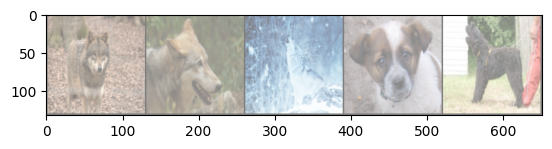

Etiquetas verdaderas:  1 1 1 0 0
Predicciones:  1 1 1 0 0


In [ ]:
torch.manual_seed(0)

# Entrenamiento y validación de modelos individuales
num_models = 3
models = [AdvancedCNN().to(device) for _ in range(num_models)]
best_models = []
train_losses_all = []
val_losses_all = []
train_accuracies_all = []
val_accuracies_all = []

for model_idx, model in enumerate(models):
    print(f"Training model {model_idx+1}")
    best_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, num_epochs=10)

    best_models.append(best_model)
    train_losses_all.append(train_losses)
    val_losses_all.append(val_losses)
    train_accuracies_all.append(train_accuracies)
    val_accuracies_all.append(val_accuracies)

# Reentrenamiento con el conjunto de entrenamiento y validación combinados
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_loader = DataLoader(full_train_data, batch_size=32, shuffle=True)

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
all_best_models = []

for model_idx, model in enumerate(best_models):
    print(f"Re-training model {model_idx+1} with full train data")
    model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, full_train_loader, None, num_epochs=5)

    torch.save(model.state_dict(), f'final_model_{model_idx+1}.pth')
    all_best_models.append(model)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)

accuracies = []
# Evaluación final de cada modelo en el conjunto de prueba
for model_idx, model in enumerate(best_models):
    model.load_state_dict(torch.load(f'final_model_{model_idx+1}.pth'))
    test_accuracy = calculate_accuracy(model, test_loader)
    accuracies.append(test_accuracy)
    print(f"Final Test Accuracy for model {model_idx+1}: {test_accuracy}%")


# Evaluación final del ensemble en el conjunto de prueba
ensemble_test_accuracy = evaluate_ensemble(best_models, test_loader)
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy}%")

# Llamar a la función con un modelo y un cargador de datos
visualize_predictions(best_models[0], test_loader)

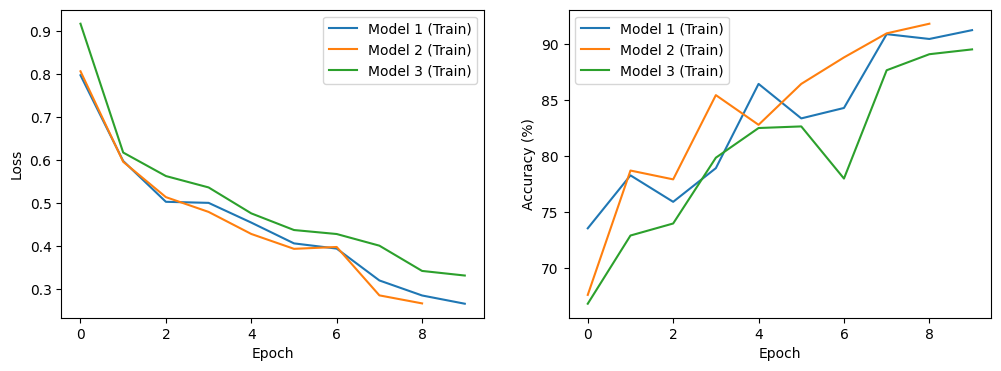

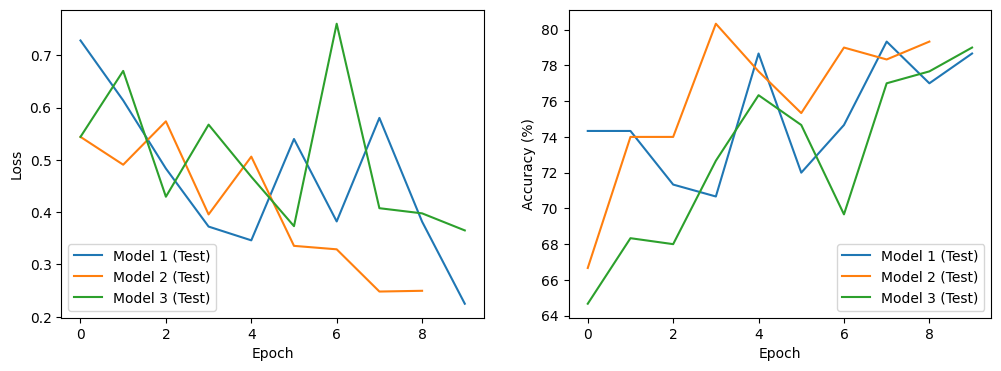

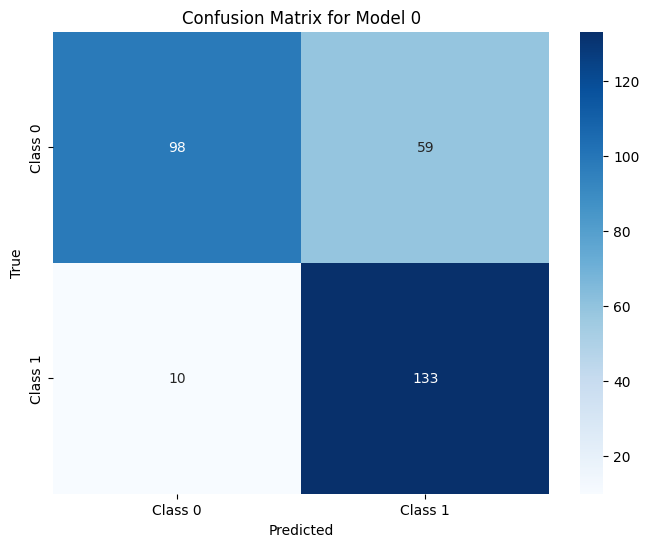

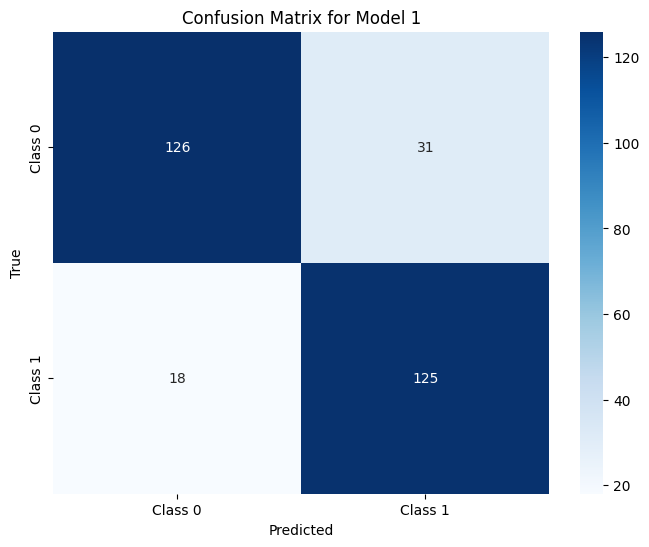

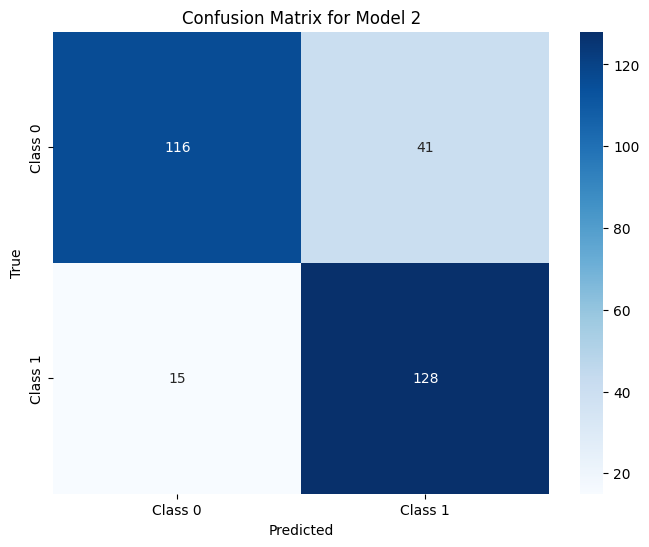

In [ ]:
visualizacion_perdida_precision(train_losses_all, train_accuracies_all, 'Train')
# Suponiendo que val_losses_all y val_accuracies_all son listas de listas con tensores en GPU
val_losses_all_cpu = [[tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in sublist] for sublist in val_losses_all]
val_accuracies_all_cpu = [[tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in sublist] for sublist in val_accuracies_all]

visualizacion_perdida_precision(val_losses_all_cpu, val_accuracies_all_cpu, 'Test')

# Elegir un modelo específico para la matriz de confusión (por ejemplo, el primer modelo)
for i in range(len(best_models)):
  plot_confusion_matrix(best_models[i], test_loader, i)

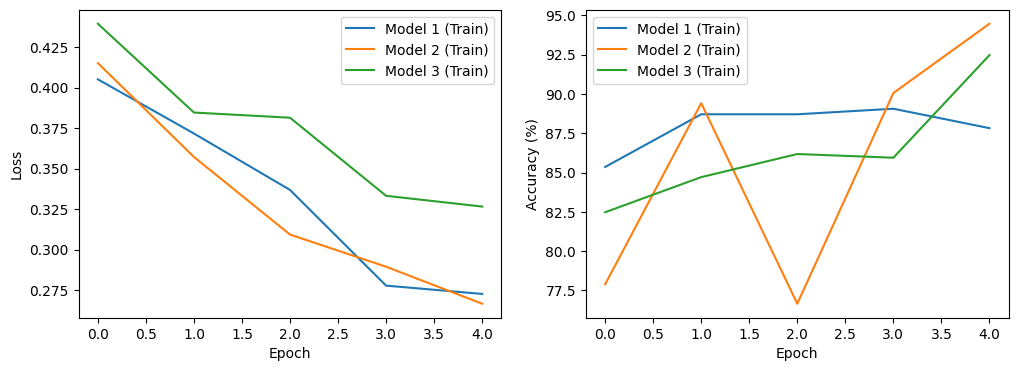

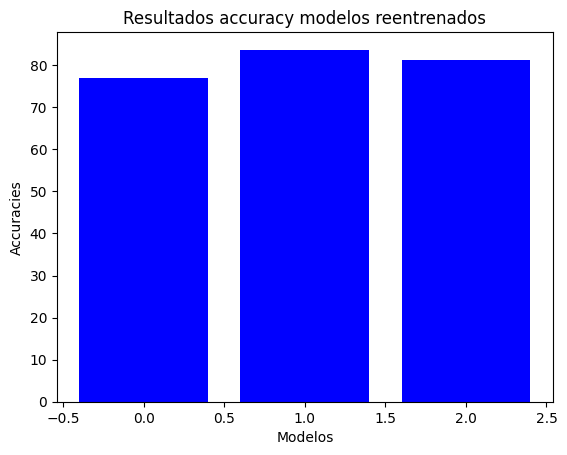

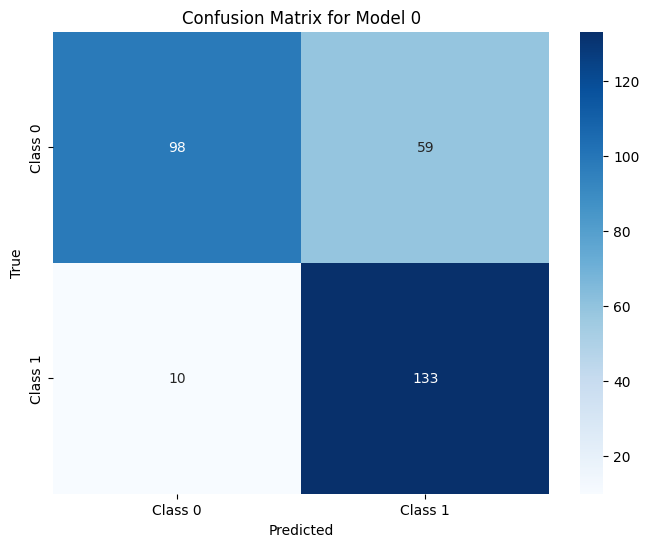

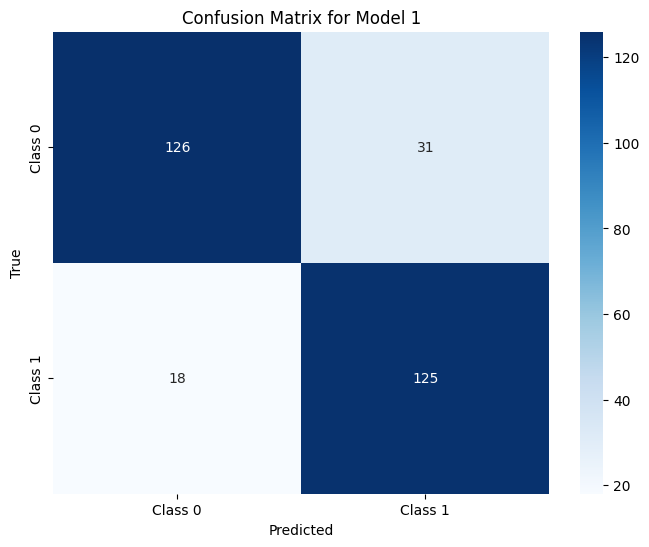

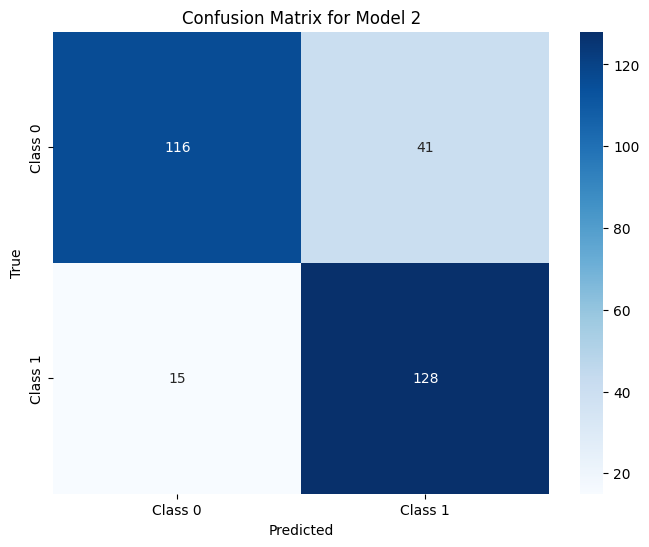

In [ ]:
# resultados modelos reentrenados
visualizacion_perdida_precision(all_train_losses, all_train_accuracies, 'Train')
accuracy_results(accuracies)

# Elegir un modelo específico para la matriz de confusión (por ejemplo, el primer modelo)
for i in range(len(all_best_models)):
  plot_confusion_matrix(all_best_models[i], test_loader, i)

#### 2.4.2 ImprovedCNN

Training model 1
Epoch 1, Loss: 0.6556279239329424, Training Accuracy: 54.57142857142857%
Validation Accuracy: 54.666666666666664%
Epoch 2, Loss: 0.5860943455587734, Training Accuracy: 76.21428571428571%
Validation Accuracy: 74.0%
Epoch 3, Loss: 0.5430376319722696, Training Accuracy: 76.28571428571429%
Validation Accuracy: 73.33333333333333%
Epoch 4, Loss: 0.5135307975790717, Training Accuracy: 79.0%
Validation Accuracy: 74.0%
Epoch 5, Loss: 0.48799785700711334, Training Accuracy: 77.92857142857143%
Validation Accuracy: 73.33333333333333%
Epoch 6, Loss: 0.4947989813306115, Training Accuracy: 81.35714285714286%
Validation Accuracy: 78.33333333333333%
Epoch 7, Loss: 0.4527951018376784, Training Accuracy: 82.28571428571429%
Validation Accuracy: 78.0%
Epoch 8, Loss: 0.4122880724343387, Training Accuracy: 85.57142857142857%
Validation Accuracy: 80.33333333333333%
Epoch 9, Loss: 0.40275565738027747, Training Accuracy: 85.92857142857143%
Validation Accuracy: 81.33333333333333%
Epoch 10, Loss:

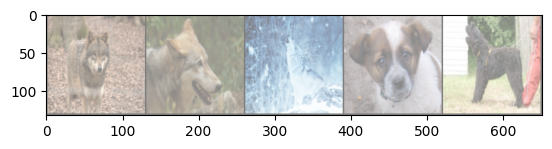

Etiquetas verdaderas:  1 1 1 0 0
Predicciones:  1 1 1 0 0


In [ ]:
torch.manual_seed(0)

num_models = 3
models = [ImprovedCNN().to(device) for _ in range(num_models)]
best_models = []
train_losses_all = []
val_losses_all = []
train_accuracies_all = []
val_accuracies_all = []

for model_idx, model in enumerate(models):
    print(f"Training model {model_idx+1}")
    best_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, num_epochs=10)
    best_models.append(best_model)
    train_losses_all.append(train_losses)
    val_losses_all.append(val_losses)
    train_accuracies_all.append(train_accuracies)
    val_accuracies_all.append(val_accuracies)

full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_loader = DataLoader(full_train_data, batch_size=32, shuffle=True)

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
all_best_models = []

for model_idx, model in enumerate(best_models):
    print(f"Re-training model {model_idx+1} with full train data")
    model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, full_train_loader, None, num_epochs=5)
    torch.save(model.state_dict(), f'final_model_{model_idx+1}.pth')
    all_best_models.append(model)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)

accuracies = []
for model_idx, model in enumerate(best_models):
    model.load_state_dict(torch.load(f'final_model_{model_idx+1}.pth'))
    test_accuracy = calculate_accuracy(model, test_loader)
    accuracies.append(test_accuracy)
    print(f"Final Test Accuracy for model {model_idx+1}: {test_accuracy}%")

ensemble_test_accuracy = evaluate_ensemble(best_models, test_loader)
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy}%")

visualize_predictions(best_models[0], test_loader)

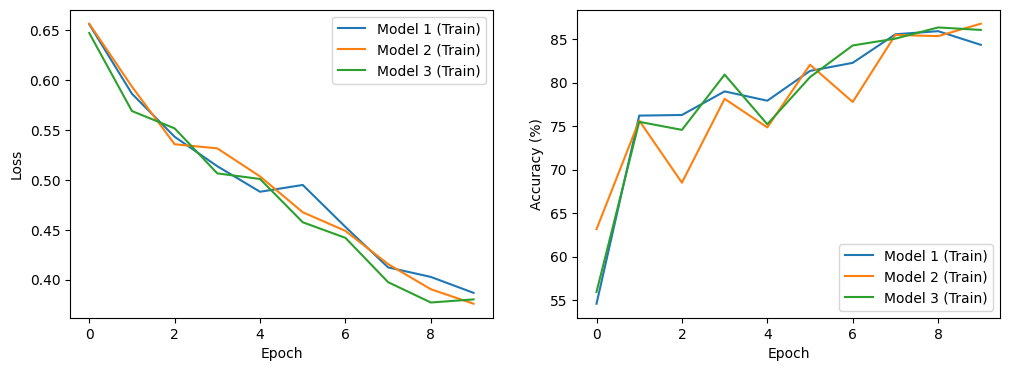

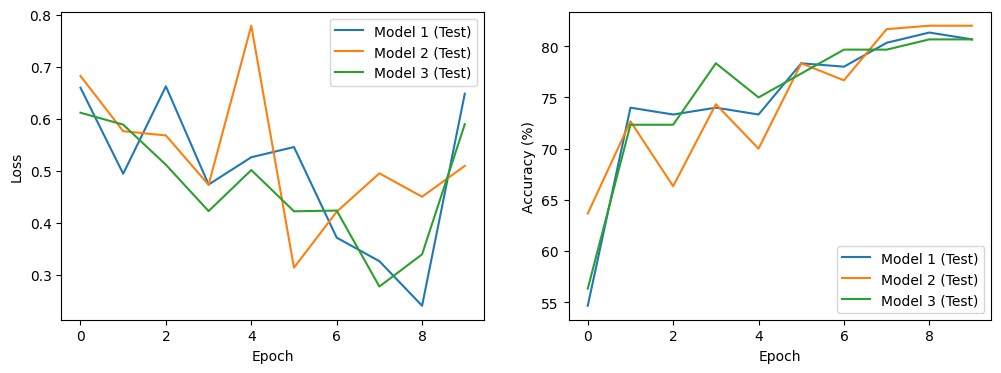

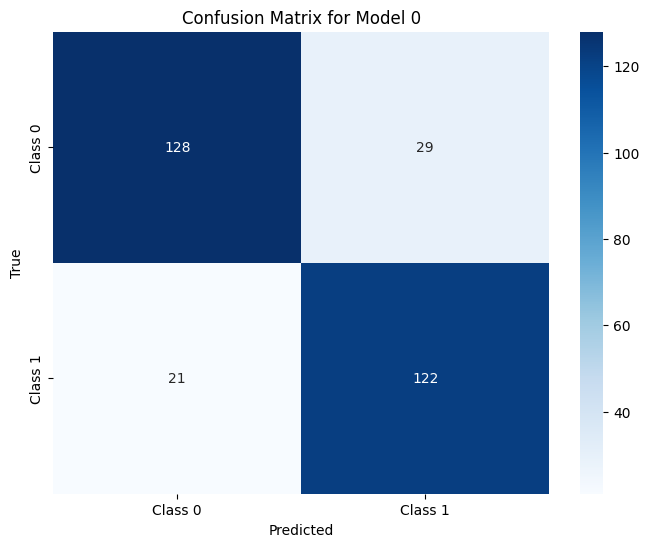

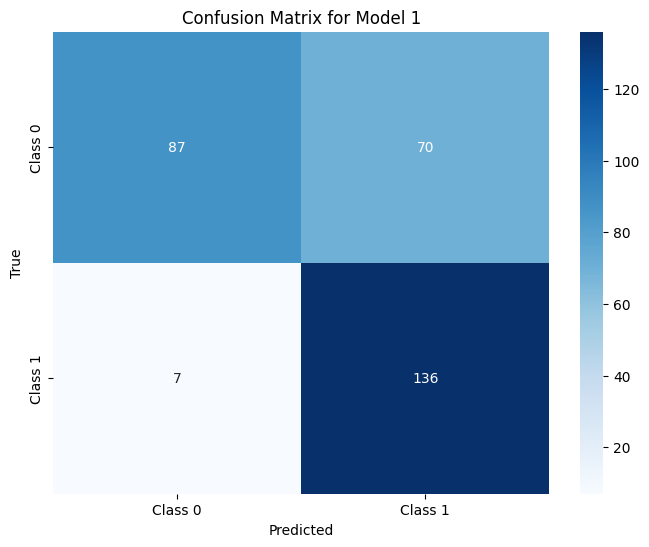

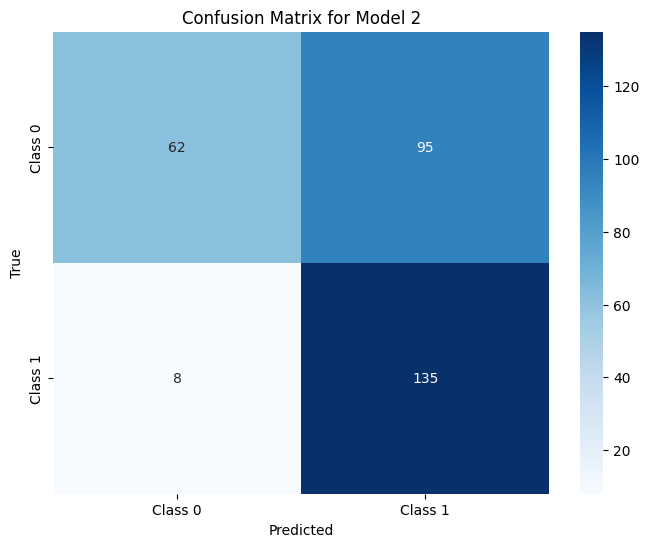

In [ ]:
visualizacion_perdida_precision(train_losses_all, train_accuracies_all, 'Train')
# Suponiendo que val_losses_all y val_accuracies_all son listas de listas con tensores en GPU
val_losses_all_cpu = [[tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in sublist] for sublist in val_losses_all]
val_accuracies_all_cpu = [[tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in sublist] for sublist in val_accuracies_all]

visualizacion_perdida_precision(val_losses_all_cpu, val_accuracies_all_cpu, 'Test')

# Elegir un modelo específico para la matriz de confusión (por ejemplo, el primer modelo)
for i in range(len(best_models)):
  plot_confusion_matrix(best_models[i], test_loader, i)

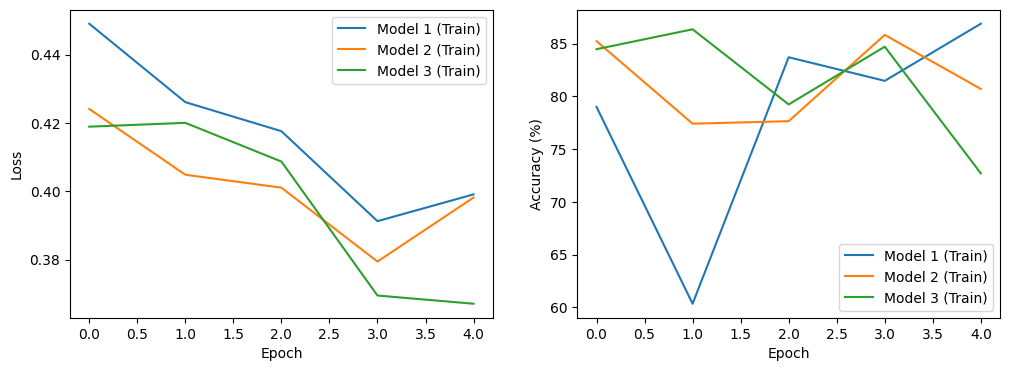

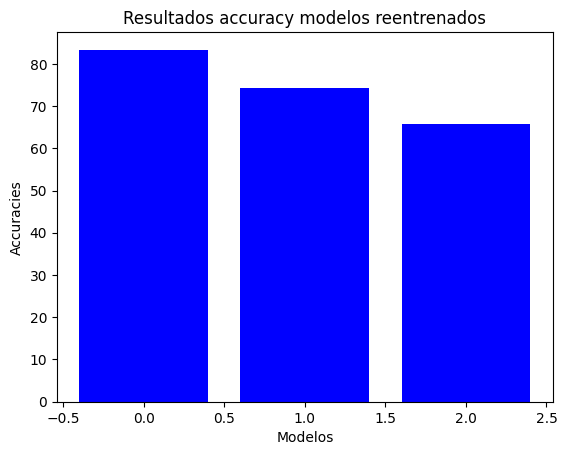

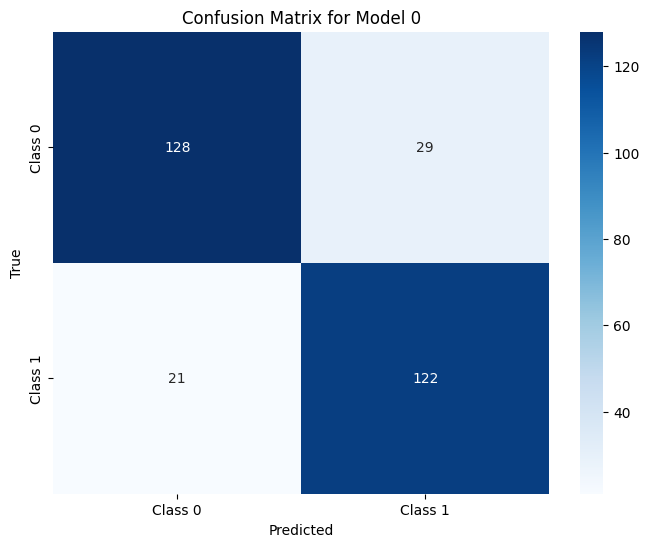

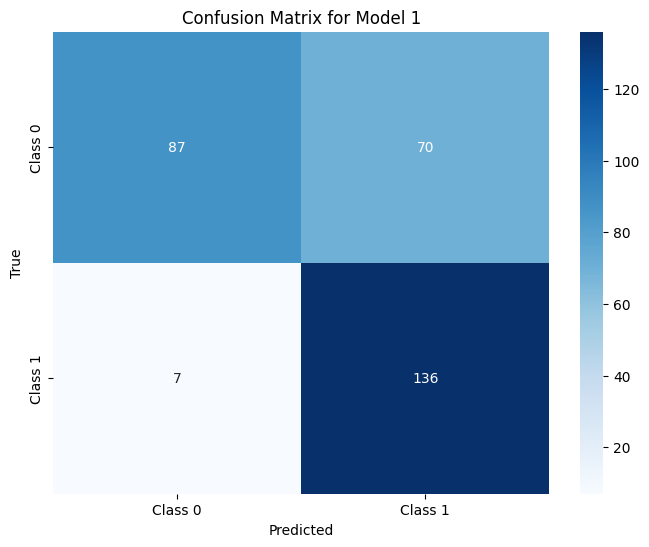

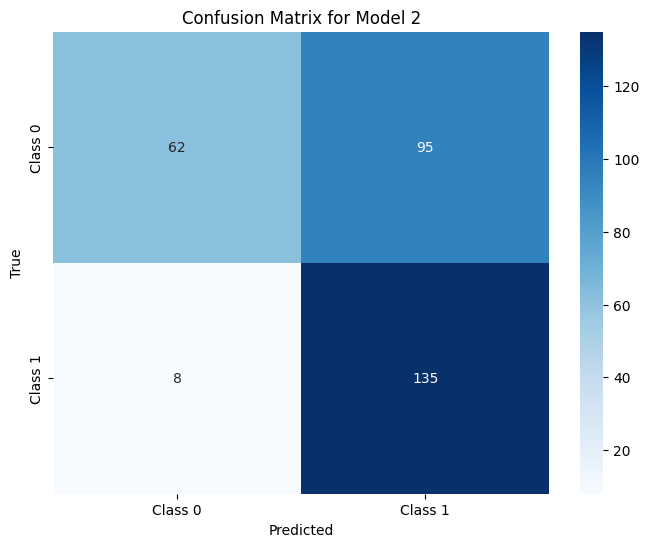

In [ ]:
visualizacion_perdida_precision(all_train_losses, all_train_accuracies, 'Train')
accuracy_results(accuracies)

# Elegir un modelo específico para la matriz de confusión (por ejemplo, el primer modelo)
for i in range(len(all_best_models)):
  plot_confusion_matrix(all_best_models[i], test_loader, i)

## 2.5 Aplicar a ambas redes distintos optimizadores

Epoch 1, Loss: 0.6813907514918934, Training Accuracy: 61.285714285714285%
Validation Accuracy: 60.333333333333336%
Epoch 2, Loss: 0.599115561355244, Training Accuracy: 59.92857142857143%
Validation Accuracy: 56.666666666666664%
Epoch 3, Loss: 0.5413263379172846, Training Accuracy: 73.64285714285714%
Validation Accuracy: 72.33333333333333%
Epoch 4, Loss: 0.4710890054702759, Training Accuracy: 82.14285714285714%
Validation Accuracy: 76.66666666666667%
Epoch 5, Loss: 0.42125114324417984, Training Accuracy: 75.57142857142857%
Validation Accuracy: 72.33333333333333%
Epoch 6, Loss: 0.36325073953379283, Training Accuracy: 85.14285714285714%
Validation Accuracy: 75.66666666666667%
Epoch 7, Loss: 0.3614217161454938, Training Accuracy: 79.64285714285714%
Validation Accuracy: 71.0%
Epoch 8, Loss: 0.27647210928526794, Training Accuracy: 92.78571428571429%
Validation Accuracy: 79.33333333333333%
Epoch 9, Loss: 0.23972995748574083, Training Accuracy: 93.92857142857143%
Validation Accuracy: 78.666666

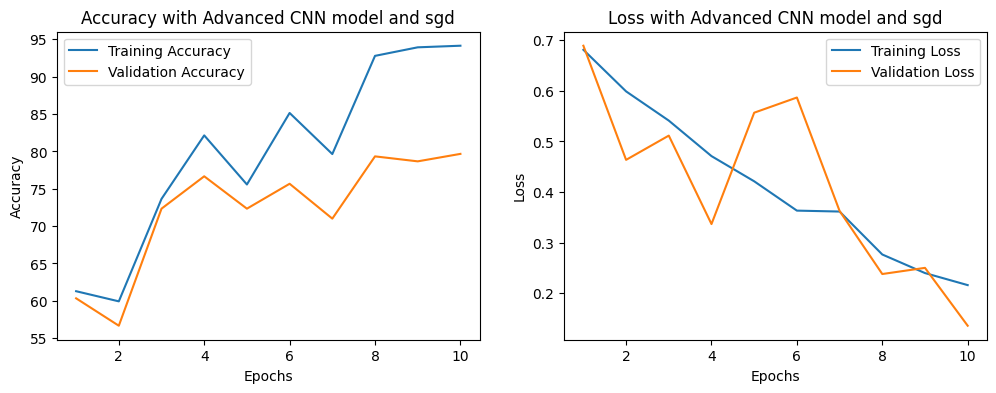

Epoch 1, Loss: 15.931418953632766, Training Accuracy: 49.642857142857146%
Validation Accuracy: 49.333333333333336%
Epoch 2, Loss: 0.8656747544353659, Training Accuracy: 53.214285714285715%
Validation Accuracy: 50.333333333333336%
Epoch 3, Loss: 0.7499798366969282, Training Accuracy: 70.71428571428571%
Validation Accuracy: 63.666666666666664%
Epoch 4, Loss: 0.7064092240550301, Training Accuracy: 69.07142857142857%
Validation Accuracy: 65.66666666666667%
Epoch 5, Loss: 0.6872234744104472, Training Accuracy: 74.57142857142857%
Validation Accuracy: 73.0%
Epoch 6, Loss: 0.6369882029565898, Training Accuracy: 74.07142857142857%
Validation Accuracy: 70.66666666666667%
Epoch 7, Loss: 0.6331841796636581, Training Accuracy: 54.214285714285715%
Validation Accuracy: 56.666666666666664%
Epoch 8, Loss: 0.4980218105695464, Training Accuracy: 82.0%
Validation Accuracy: 77.33333333333333%
Epoch 9, Loss: 0.43824008547446947, Training Accuracy: 82.21428571428571%
Validation Accuracy: 78.33333333333333%
E

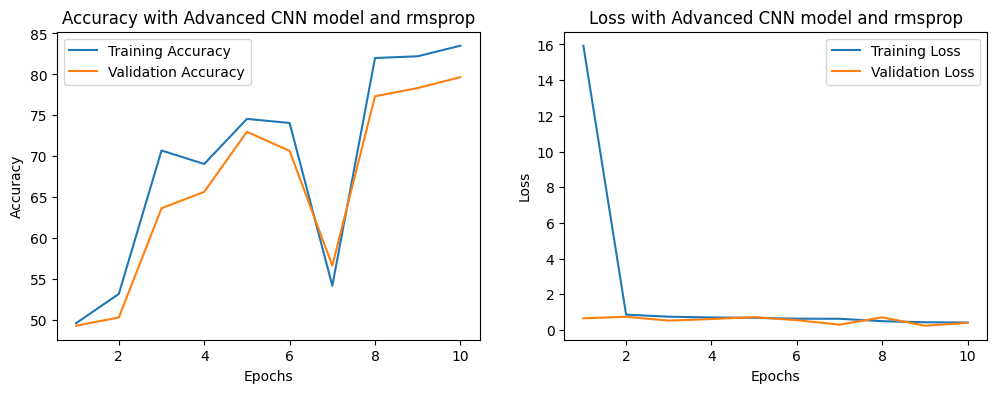

Epoch 1, Loss: 38.10012475265698, Training Accuracy: 49.642857142857146%
Validation Accuracy: 49.333333333333336%
Epoch 2, Loss: 0.7050918835130605, Training Accuracy: 69.71428571428571%
Validation Accuracy: 65.0%
Epoch 3, Loss: 0.650276624343612, Training Accuracy: 69.78571428571429%
Validation Accuracy: 65.0%
Epoch 4, Loss: 0.6205978014252402, Training Accuracy: 70.57142857142857%
Validation Accuracy: 66.0%
Epoch 5, Loss: 0.5946424054828557, Training Accuracy: 70.92857142857143%
Validation Accuracy: 66.33333333333333%
Epoch 6, Loss: 0.5975738404826685, Training Accuracy: 71.92857142857143%
Validation Accuracy: 66.33333333333333%
Epoch 7, Loss: 0.5853605432943865, Training Accuracy: 75.57142857142857%
Validation Accuracy: 73.33333333333333%
Epoch 8, Loss: 0.5757893879305233, Training Accuracy: 75.64285714285714%
Validation Accuracy: 72.0%
Epoch 9, Loss: 0.5621137334541841, Training Accuracy: 75.92857142857143%
Validation Accuracy: 72.66666666666667%
Epoch 10, Loss: 0.5654257901690223,

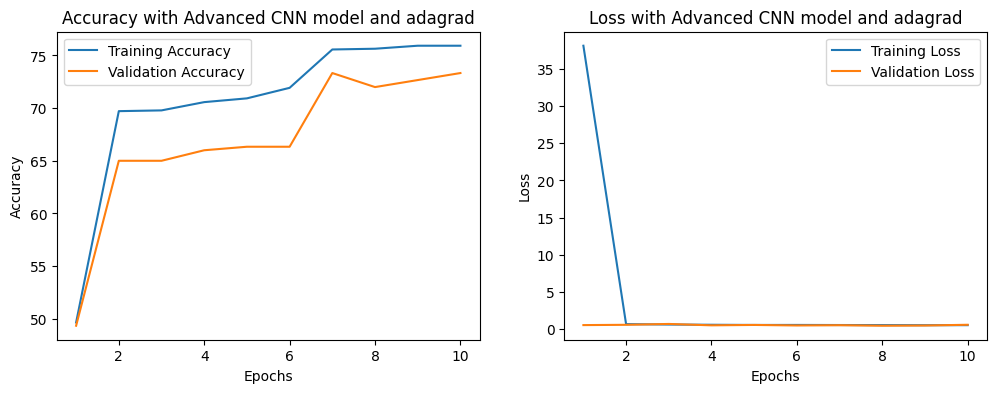

Epoch 1, Loss: 0.6993724473498084, Training Accuracy: 56.142857142857146%
Validation Accuracy: 55.666666666666664%
Epoch 2, Loss: 0.6574082130735571, Training Accuracy: 70.78571428571429%
Validation Accuracy: 68.33333333333333%
Epoch 3, Loss: 0.6133817366578362, Training Accuracy: 72.07142857142857%
Validation Accuracy: 70.33333333333333%
Epoch 4, Loss: 0.5824664147062735, Training Accuracy: 74.0%
Validation Accuracy: 71.66666666666667%
Epoch 5, Loss: 0.5594134872609918, Training Accuracy: 72.92857142857143%
Validation Accuracy: 72.33333333333333%
Epoch 6, Loss: 0.5373834120956335, Training Accuracy: 78.07142857142857%
Validation Accuracy: 75.66666666666667%
Epoch 7, Loss: 0.5201706886291504, Training Accuracy: 71.57142857142857%
Validation Accuracy: 72.0%
Epoch 8, Loss: 0.49295945126901974, Training Accuracy: 79.5%
Validation Accuracy: 77.0%
Epoch 9, Loss: 0.48563072898171167, Training Accuracy: 81.21428571428571%
Validation Accuracy: 77.66666666666667%
Epoch 10, Loss: 0.4809363734993

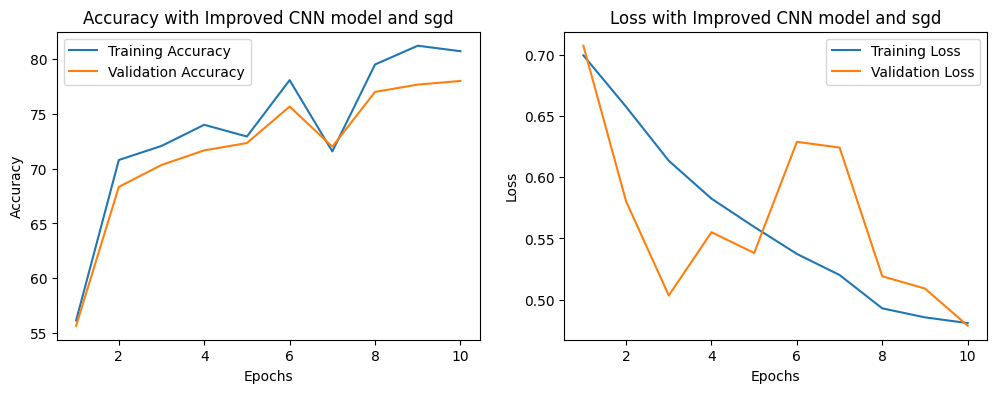

Epoch 1, Loss: 0.6565001891417936, Training Accuracy: 70.5%
Validation Accuracy: 66.0%
Epoch 2, Loss: 0.6115420318462632, Training Accuracy: 62.142857142857146%
Validation Accuracy: 62.0%
Epoch 3, Loss: 0.5753127722577616, Training Accuracy: 73.07142857142857%
Validation Accuracy: 73.0%
Epoch 4, Loss: 0.5327317064458673, Training Accuracy: 59.92857142857143%
Validation Accuracy: 61.666666666666664%
Epoch 5, Loss: 0.537107998674566, Training Accuracy: 69.85714285714286%
Validation Accuracy: 64.33333333333333%
Epoch 6, Loss: 0.5201713036407124, Training Accuracy: 60.357142857142854%
Validation Accuracy: 59.0%
Epoch 7, Loss: 0.5013416998765685, Training Accuracy: 70.5%
Validation Accuracy: 66.66666666666667%
Epoch 8, Loss: 0.4319990107958967, Training Accuracy: 83.85714285714286%
Validation Accuracy: 78.66666666666667%
Epoch 9, Loss: 0.41589889946309005, Training Accuracy: 84.71428571428571%
Validation Accuracy: 78.66666666666667%
Epoch 10, Loss: 0.3878187750550834, Training Accuracy: 85.

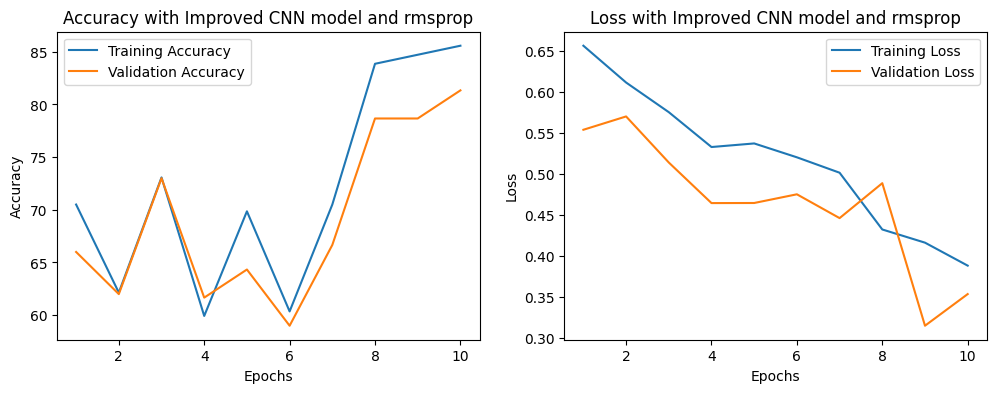

Epoch 1, Loss: 0.6831012937155637, Training Accuracy: 50.714285714285715%
Validation Accuracy: 51.666666666666664%
Epoch 2, Loss: 0.5530551184307445, Training Accuracy: 62.5%
Validation Accuracy: 59.666666666666664%
Epoch 3, Loss: 0.5080810778520324, Training Accuracy: 78.07142857142857%
Validation Accuracy: 77.66666666666667%
Epoch 4, Loss: 0.4678778905760158, Training Accuracy: 54.57142857142857%
Validation Accuracy: 54.333333333333336%
Epoch 5, Loss: 0.4408466585657813, Training Accuracy: 76.35714285714286%
Validation Accuracy: 70.0%
Epoch 6, Loss: 0.429798000915484, Training Accuracy: 69.07142857142857%
Validation Accuracy: 67.0%
Epoch 7, Loss: 0.42033694074912503, Training Accuracy: 77.21428571428571%
Validation Accuracy: 73.0%
Epoch 8, Loss: 0.36662566526369617, Training Accuracy: 87.42857142857143%
Validation Accuracy: 84.66666666666667%
Epoch 9, Loss: 0.3547781997106292, Training Accuracy: 87.57142857142857%
Validation Accuracy: 84.66666666666667%
Epoch 10, Loss: 0.354644200679

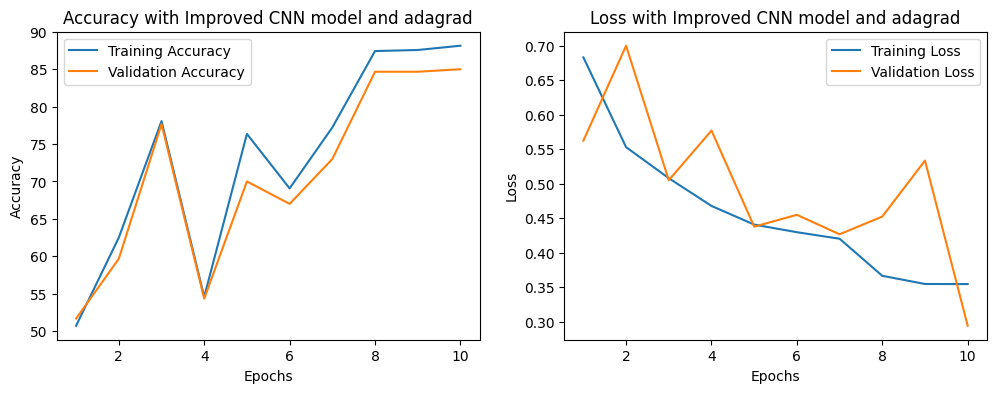

In [ ]:
# Después de modificar la función train_model, puedes usarla para obtener las métricas y luego graficarlas.
# Asegúrate de tener instalada la librería matplotlib antes de ejecutar este código.
import matplotlib.pyplot as plt

# Crear una instancia del modelo (por ejemplo, AdvancedCNN)
models = {AdvancedCNN().to(device):'Advanced CNN model', ImprovedCNN().to(device): 'Improved CNN model'}
optimizers = ['sgd', 'rmsprop', 'adagrad']
for model, model_name in models.items():
    for optimizer in optimizers:
        # Entrenar el modelo con métricas
        trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, num_epochs=10, l1_lambda=0.0, l2_lambda=1e-5, optimizer_type=optimizer)
        # Graficar las métricas
        #epochs_range = range(1, len(train_accuracies) + 1)
        plot_results(train_accuracies, val_accuracies, train_losses, val_losses, model_name, optimizer)

## 2.6 Transfer Learning

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


Training model 1
Epoch 1, Loss: 0.3839485337111083, Training Accuracy: 97.5%
Validation Accuracy: 95.0%
Epoch 2, Loss: 0.10555021223527464, Training Accuracy: 99.71428571428571%
Validation Accuracy: 96.33333333333333%
Epoch 3, Loss: 0.043166219383816824, Training Accuracy: 99.85714285714286%
Validation Accuracy: 95.33333333333333%
Epoch 4, Loss: 0.027663414911578664, Training Accuracy: 99.92857142857143%
Validation Accuracy: 96.0%
Epoch 5, Loss: 0.012407371906605973, Training Accuracy: 100.0%
Validation Accuracy: 97.0%
Training model 2
Epoch 1, Loss: 0.34955787895755336, Training Accuracy: 98.14285714285714%
Validation Accuracy: 95.0%
Epoch 2, Loss: 0.09454317983578552, Training Accuracy: 99.57142857142857%
Validation Accuracy: 96.0%
Epoch 3, Loss: 0.028915258516049522, Training Accuracy: 99.78571428571429%
Validation Accuracy: 96.0%
Epoch 4, Loss: 0.015344703252511945, Training Accuracy: 100.0%
Validation Accuracy: 96.0%
Epoch 5, Loss: 0.009894796485737474, Training Accuracy: 100.0%
V

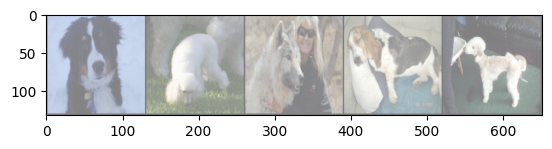

Etiquetas verdaderas:  0 0 1 0 0
Predicciones:  0 0 1 0 0


In [ ]:
import torchvision.models as models
train_data, train_loader, val_loader, test_loader, val_data = load_data()

# Definir una nueva clase que extienda ResNet18, que es una arquitectura preentrenada en un conjunto de datos específico
class TransferLearningCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(TransferLearningCNN, self).__init__()
        resnet18 = models.resnet18(pretrained=True)

        # Utilizar las capas convolucionales de ResNet18
        self.features = nn.Sequential(*list(resnet18.children())[:-2])

        # Agregar capas de clasificación personalizadas
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Crear una instancia del modelo TransferLearningCNN
num_models = 3
models = [TransferLearningCNN().to(device) for _ in range(num_models)]
best_models = []
train_losses_all = []
val_losses_all = []
train_accuracies_all = []
val_accuracies_all = []

for model_idx, model in enumerate(models):
    print(f"Training model {model_idx+1}")
    best_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, num_epochs=5)
    best_models.append(best_model)
    train_losses_all.append(train_losses)
    val_losses_all.append(val_losses)
    train_accuracies_all.append(train_accuracies)
    val_accuracies_all.append(val_accuracies)

full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_loader = DataLoader(full_train_data, batch_size=32, shuffle=True)

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
all_best_models = []

for model_idx, model in enumerate(best_models):
    print(f"Re-training model {model_idx+1} with full train data")
    model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, full_train_loader, None, num_epochs=5)
    torch.save(model.state_dict(), f'final_model_{model_idx+1}.pth')
    all_best_models.append(model)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)

accuracies = []
for model_idx, model in enumerate(best_models):
    model.load_state_dict(torch.load(f'final_model_{model_idx+1}.pth'))
    test_accuracy = calculate_accuracy(model, test_loader)
    accuracies.append(test_accuracy)
    print(f"Final Test Accuracy for model {model_idx+1}: {test_accuracy}%")

ensemble_test_accuracy = evaluate_ensemble(best_models, test_loader)
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy}%")

visualize_predictions(best_models[0], test_loader)

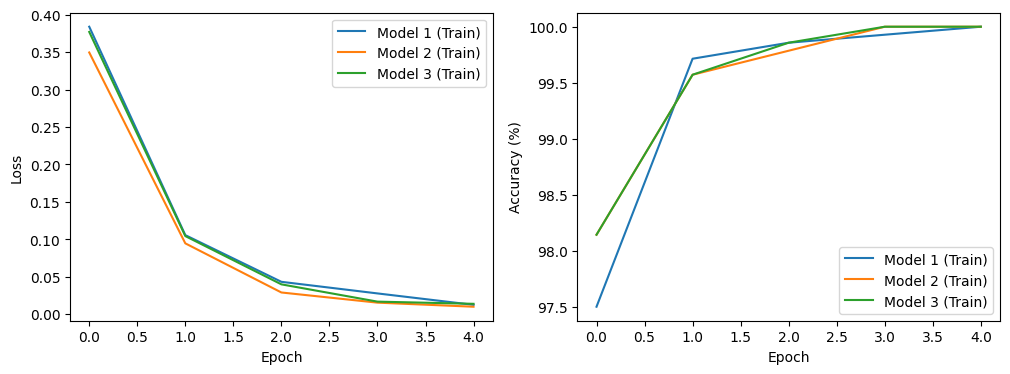

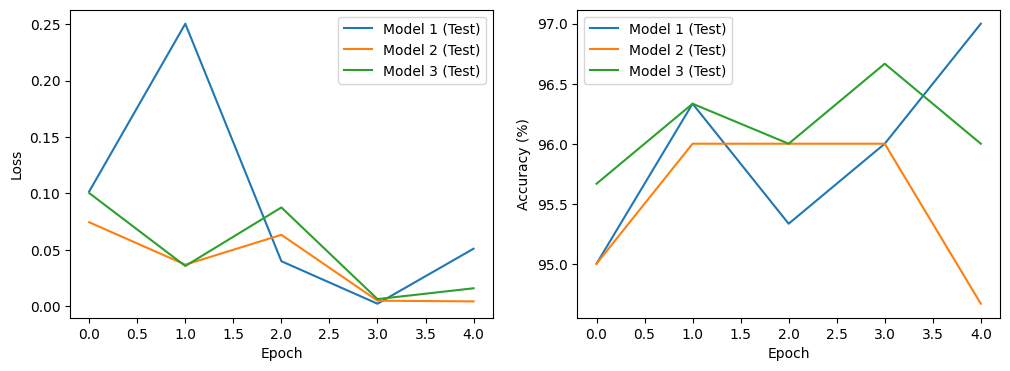

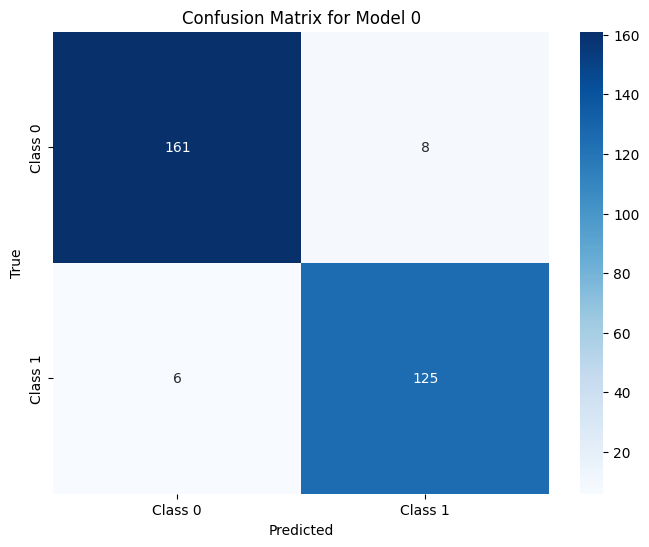

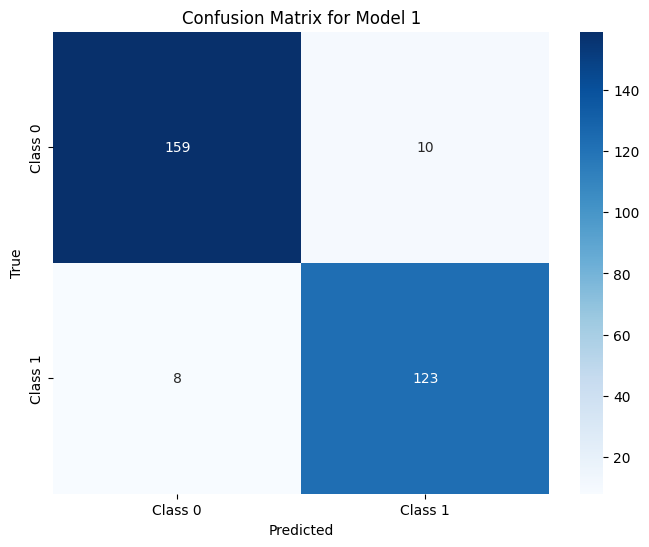

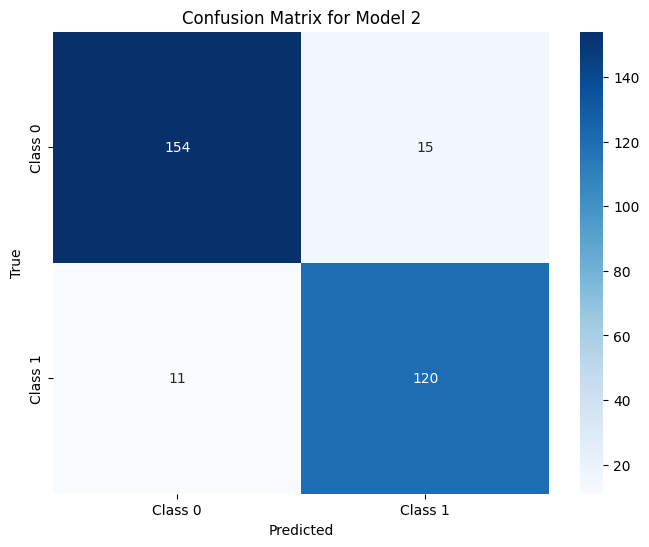

In [ ]:
visualizacion_perdida_precision(train_losses_all, train_accuracies_all, 'Train')
# Suponiendo que val_losses_all y val_accuracies_all son listas de listas con tensores en GPU
val_losses_all_cpu = [[tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in sublist] for sublist in val_losses_all]
val_accuracies_all_cpu = [[tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in sublist] for sublist in val_accuracies_all]

visualizacion_perdida_precision(val_losses_all_cpu, val_accuracies_all_cpu, 'Test')

# Elegir un modelo específico para la matriz de confusión (por ejemplo, el primer modelo)
for i in range(len(best_models)):
  plot_confusion_matrix(best_models[i], test_loader, i)

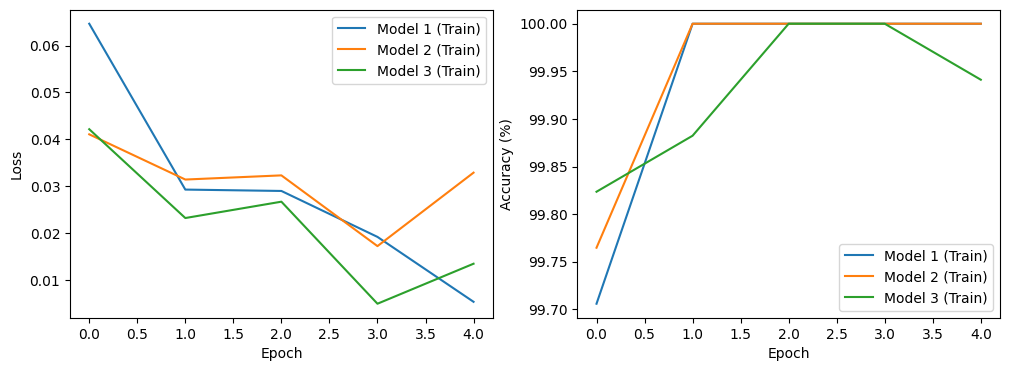

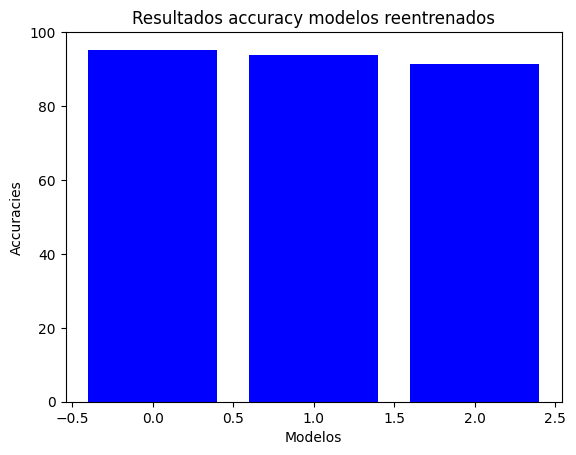

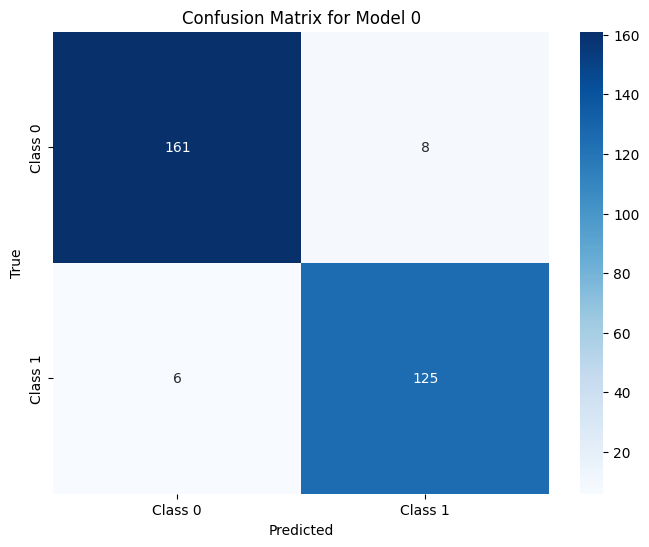

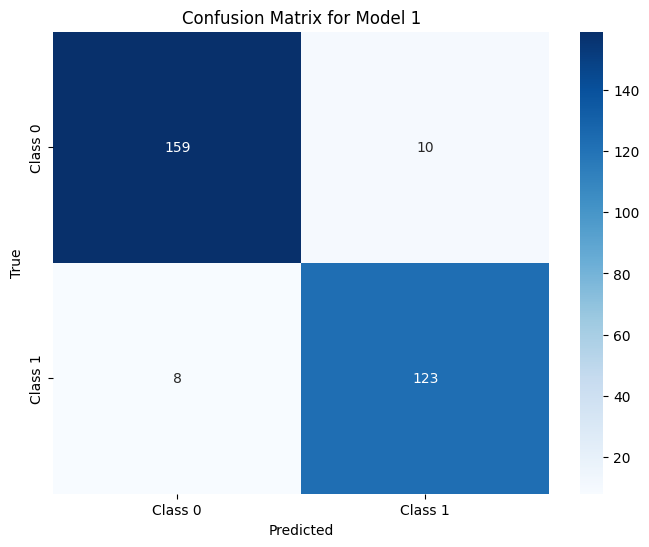

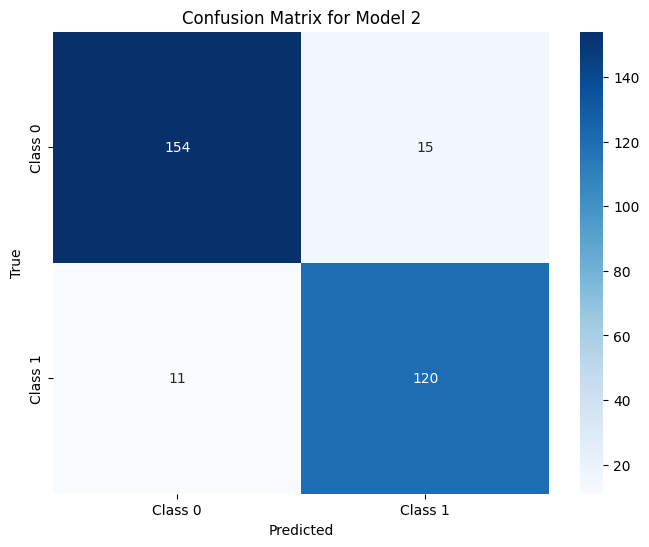

In [ ]:
visualizacion_perdida_precision(all_train_losses, all_train_accuracies, 'Train')
accuracy_results(accuracies)

# Elegir un modelo específico para la matriz de confusión (por ejemplo, el primer modelo)
for i in range(len(all_best_models)):
  plot_confusion_matrix(all_best_models[i], test_loader, i)